CULTIVOS 🌳

Seleccionamos este tema y este dataset para comprender  mejor las zonas y los cultivos que históricamente se han trabajado en el país a fines de poder clasificar cuáles serán las mejores zonas a futuro para los cultivos analizados.

Se investigarán los precios de exportación (U$D/Tn) para cada cultivo para proponer a los productores con tierras improductivas qué sembrar dependiendo la zona en la qué se encuentren.

Y por ultimo uniremos la información consoliandola con los precios historicos en los principales puertos del pais.

1- Presentacion del dataset y el contexto comercial productivo

2- Medidas de tendencia central 

3- Analisis de las principales variables 

4- Analisis sobre la superficie sembrada 

5-Analisis sobre la superficie cosechada

6-Analisis sobre la Produccion 

7-Analisis sobre el Rendimiento 

8-Primeras prueba ML 


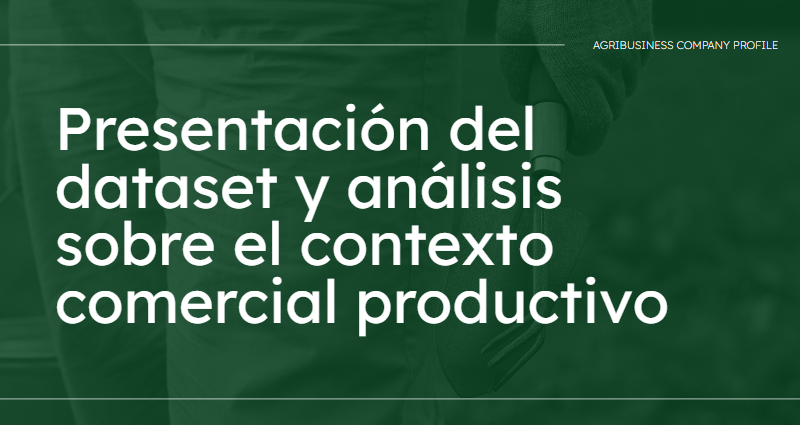

In [ ]:
import numpy as np 
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/1UD0u7qDq4Pg-JIKV9O_e9CBAPxgDMc8y/edit#gid=943612145"
url_1 = url.replace("/edit#gid=", "/export?format=xlsx&gid=")
cultivos = pd.read_excel (url_1)
cultivos

,Fecha,Mercado,Producto,Precio,precio,anio
0,2022-03-11,Buenos Aires,Girasol,736.76,736.76,2022.0
1,2022-03-15,Rosario,Girasol,699.78,699.78,2022.0
2,2022-03-10,B.Blanca,Girasol,698.71,698.71,2022.0
3,2022-03-10,Quequén,Girasol,698.71,698.71,2022.0
4,2022-03-11,Quequén,Girasol,698.71,698.71,2022.0
...,...,...,...,...,...,...
9611,2020-06-03,Rosario,Maiz,119.20,119.20,2020.0
9612,2018-09-21,Rosario,Sorgo,117.80,117.80,2018.0
9613,2019-05-09,Rosario,Sorgo,110.50,110.50,2019.0
9614,2019-05-07,Rosario,Sorgo,110.30,110.30,2019.0


🟢 Dado el dataset presentado analizaremos la evolución de determinados cultivos desarrollados en Argentina  en las diferentes campañas de siembra desde 1923 hasta 2019, a fines de  generar un modelo que nos indique cuales son las mejores zonas para la siembra. 


In [ ]:
cultivos.describe()

,anio,provincia_id,departamnto_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tn,rendimiento_kgxha
count,99463.000000,99463.000000,98810.000000,99463.000000,87305.000000,8.745000e+04,87423.000000
mean,1973.174789,32.801021,32865.383757,12572.900274,10898.689528,2.905134e+04,1701.532160
std,26.042614,29.349215,29220.845102,35002.548189,34474.271303,1.129782e+05,1499.146831
min,1923.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,1952.000000,6.000000,6616.000000,300.000000,200.000000,2.300000e+02,800.000000
50%,1974.000000,18.000000,18147.000000,2000.000000,1381.000000,1.710000e+03,1200.000000
75%,1994.000000,54.000000,54105.000000,10000.000000,7000.000000,1.140000e+04,2000.000000
max,2020.000000,94.000000,94015.000000,894613.000000,883613.000000,3.399048e+06,33333.000000


In [ ]:
cultivos.shape

(99463, 11)

In [ ]:
cultivos.isnull().sum()

cultivo_nombre                 0
anio                           0
campania                       0
provincia_nombre               0
provincia_id                   0
departamento_nombre          470
departamnto_id               653
superficie_sembrada_ha         0
superficie_cosechada_ha    12158
produccion_tn              12013
rendimiento_kgxha          12040
dtype: int64

In [ ]:
cultivos.replace(np.nan,'0',inplace = True)
cultivos.isnull().sum()

cultivo_nombre             0
anio                       0
campania                   0
provincia_nombre           0
provincia_id               0
departamento_nombre        0
departamnto_id             0
superficie_sembrada_ha     0
superficie_cosechada_ha    0
produccion_tn              0
rendimiento_kgxha          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb5d069710>,
      dtype=object)

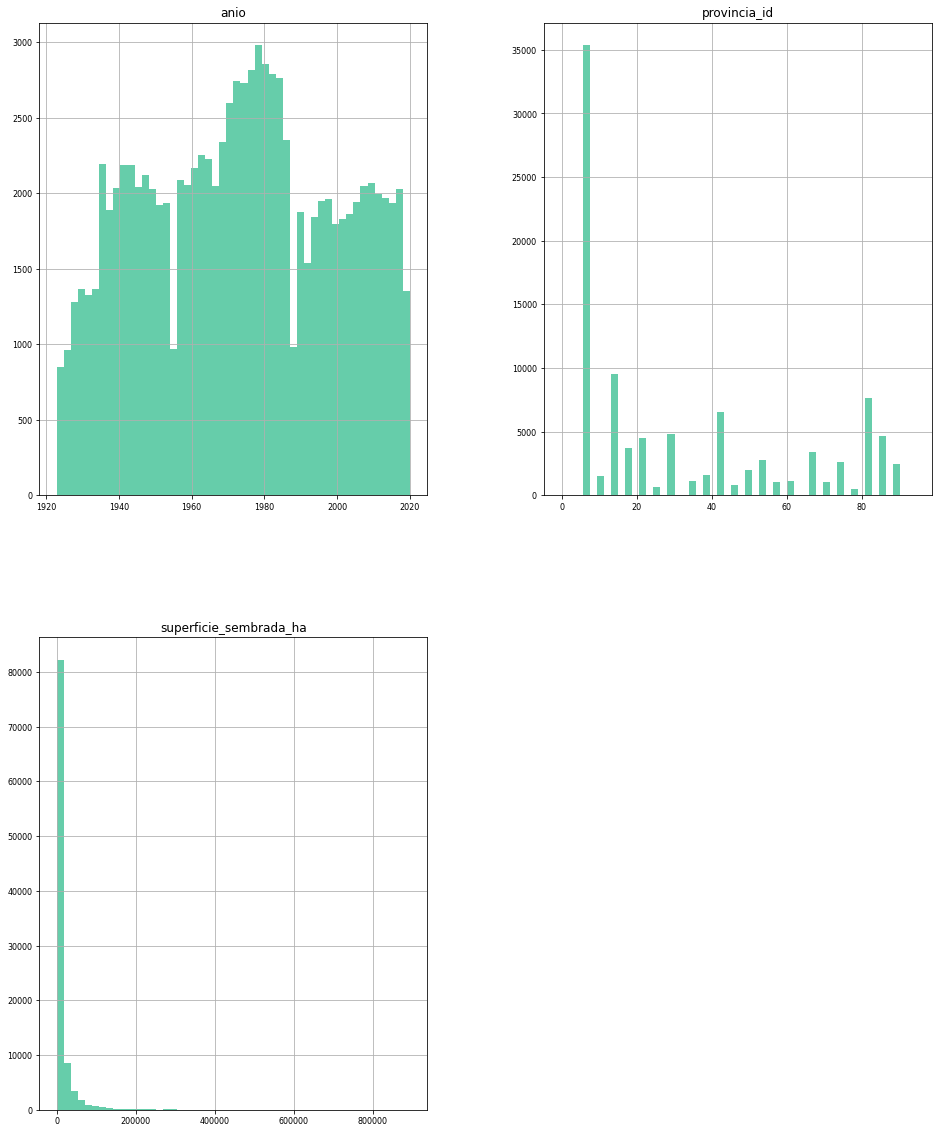

In [ ]:
cultivos.hist(figsize=(16, 20), bins=50, color='mediumaquamarine', xlabelsize=8, ylabelsize=8)

In [ ]:
cultivos.dtypes

cultivo_nombre              object
anio                       float64
campania                    object
provincia_nombre            object
provincia_id               float64
departamento_nombre         object
departamnto_id              object
superficie_sembrada_ha     float64
superficie_cosechada_ha     object
produccion_tn               object
rendimiento_kgxha           object
dtype: object

In [ ]:
cultivos.corr()

,anio,provincia_id,superficie_sembrada_ha
anio,1.000000,-0.058189,0.160556
provincia_id,-0.058189,1.000000,-0.023588
superficie_sembrada_ha,0.160556,-0.023588,1.000000


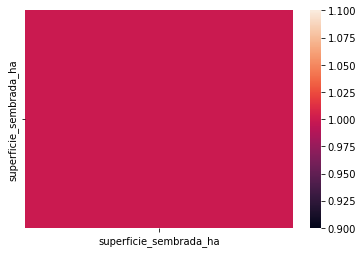

In [ ]:
import seaborn as sns
df = pd.DataFrame(cultivos, columns=["superficie_sembrada_ha","superficie_cosechada_ha","produccion_tn","rendimiento_kgxha"])
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


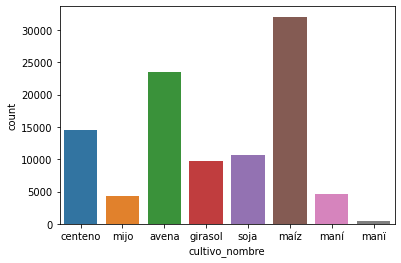

In [ ]:
cultivos['cultivo_nombre'].unique()
sns.countplot(cultivos['cultivo_nombre'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


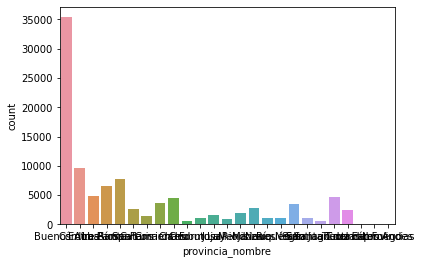

In [ ]:
cultivos['provincia_nombre'].unique()
sns.countplot(cultivos['provincia_nombre'])

In [ ]:
cultivos.value_counts()

cultivo_nombre  anio    campania   provincia_nombre  provincia_id  departamento_nombre  departamnto_id  superficie_sembrada_ha  superficie_cosechada_ha  produccion_tn  rendimiento_kgxha
avena           1923.0  1923/1924  Buenos Aires      6.0           25 de Mayo           6854.0          12000.0                 10200.0                  10200.0        1000.0               1
maíz            1964.0  1964/1965  Buenos Aires      6.0           Roque Pérez          6693.0          7000.0                  5500.0                   7700.0         1400.0               1
                                   Catamarca         10.0          Belén                10035.0         15.0                    15.0                     9.0            600.0                1
                                                                   Andalgalá            10021.0         50.0                    50.0                     38.0           760.0                1
                                                  

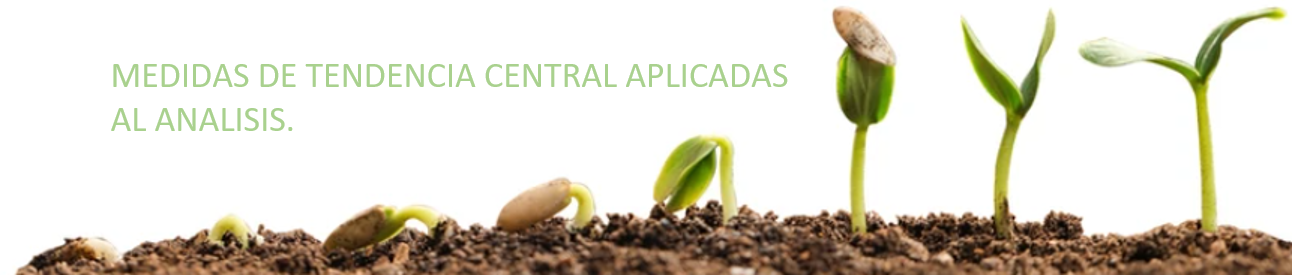

MEDIDAS DE TENDENCIA CENTRAL 🌱

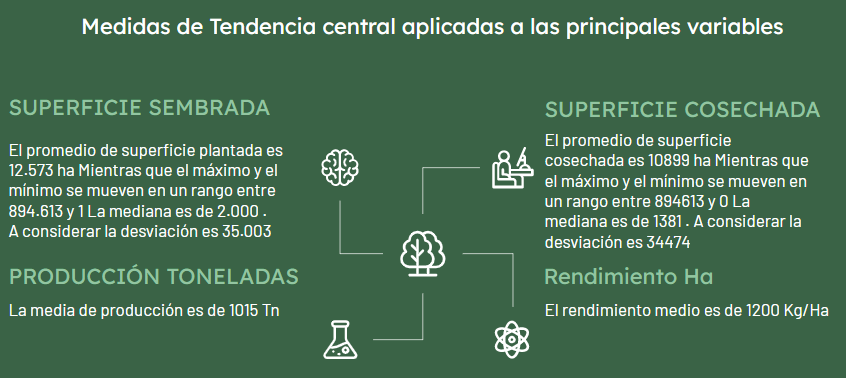

In [ ]:
Median = round(cultivos['produccion_tn'].median())
print('La media de produccion es de',Median,'Tn')



La media de produccion es de 1015 Tn


In [ ]:
Median = round(cultivos['rendimiento_kgxha'].median())
print('El rendimiento medio es de',Median,'Kg/Ha')

El rendimiento medio es de 1100 Kg/Ha


In [ ]:
Promedio= round( cultivos['superficie_sembrada_ha'].mean())
Desvio = round( cultivos['superficie_sembrada_ha'].std())
Min = round( cultivos['superficie_sembrada_ha'].min())
Median1 = round( cultivos['superficie_sembrada_ha'].median())


print('El promedio de superficie plantada es ', Promedio , 'ha','Mientras que el maximo y el minimo se mueven en un rango entre',Max, 'y', Min)
print('La  mediana es de ', Median1,'.')
print('A considerar la desviación es ', Desvio)

In [ ]:
Promedio= round( cultivos['superficie_cosechada_ha'].mean())
Desvio = round( cultivos['superficie_cosechada_ha'].std())
Min = round( cultivos['superficie_cosechada_ha'].min())
Median = round( cultivos['superficie_cosechada_ha'].median())


print('El promedio de superficie cosechada es ', Promedio , 'ha','Mientras que el maximo y el minimo se mueven en un rango entre',Max, 'y', Min)
print('La  mediana es de ', Median,'.')
print('A considerar la desviación es ', Desvio)

El promedio de superficie cosechada es  10899 ha Mientras que el maximo y el minimo se mueven en un rango entre 894613 y 0
La  mediana es de  1381 .
A considerar la desviación es  34474


ANALISIS DE VARIABLES ⚛
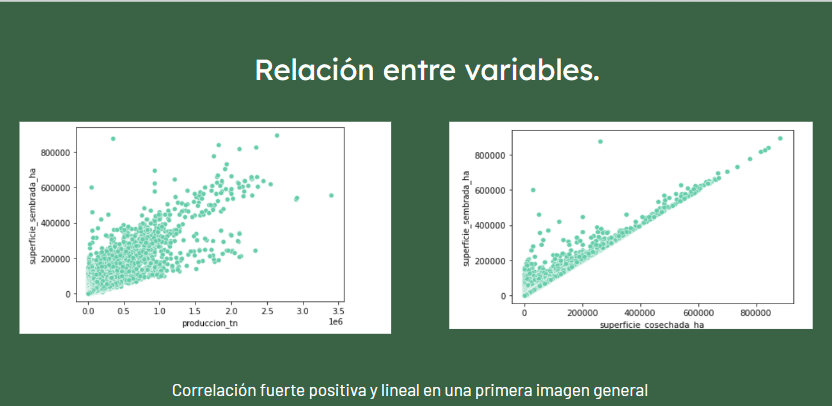

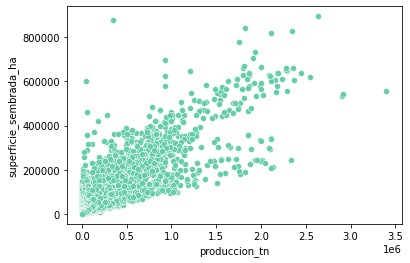

In [ ]:
sns.scatterplot(x = "produccion_tn", y = "superficie_sembrada_ha", data = cultivos,color= 'mediumaquamarine');

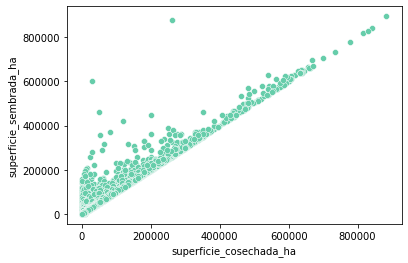

In [ ]:
sns.scatterplot(x = "superficie_cosechada_ha", y = "superficie_sembrada_ha", data = cultivos,color= 'mediumaquamarine');

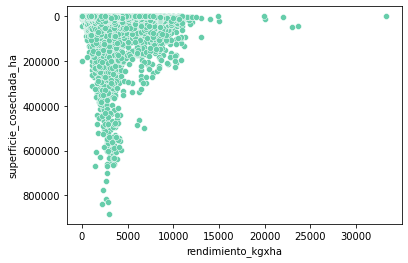

In [ ]:
sns.scatterplot(x = "rendimiento_kgxha", y = "superficie_cosechada_ha", data = cultivos,color= 'mediumaquamarine');

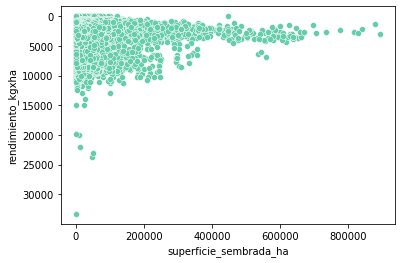

In [ ]:
sns.scatterplot(x = "superficie_sembrada_ha", y = "rendimiento_kgxha", data = cultivos,color= 'mediumaquamarine');

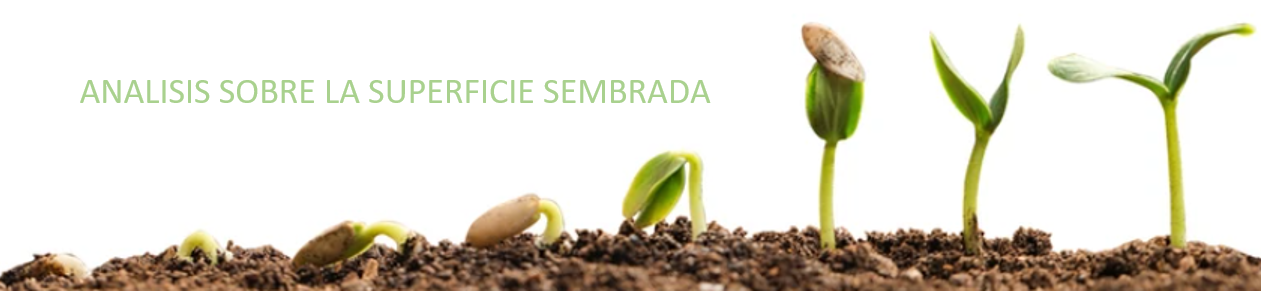

In [ ]:
cultivos[cultivos['superficie_sembrada_ha']==1].head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamnto_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tn,rendimiento_kgxha
2034,centeno,1936.0,1936/1937,Catamarca,10.0,Ambato,10007.0,1.0,0,0,0
2037,centeno,1936.0,1936/1937,Catamarca,10.0,Pomán,10084.0,1.0,0,0,0
2104,centeno,1936.0,1936/1937,La Rioja,46.0,Pelagio B. Luna,46119.0,1.0,0,0,0
2108,centeno,1936.0,1936/1937,Mendoza,50.0,Santa Rosa,50112.0,1.0,1.0,1.0,1000.0
2116,centeno,1936.0,1936/1937,Neuquén,58.0,Confluencia,58035.0,1.0,1.0,1.0,1000.0


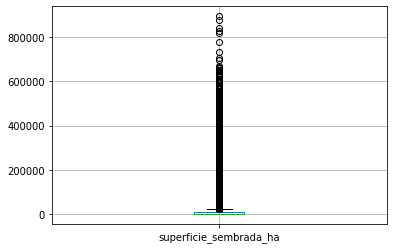

In [ ]:
cultivos[['superficie_sembrada_ha']].boxplot()

In [ ]:
sup_semb = cultivos.iloc [:,[0,7]] #Data sobre Superficie Sembrada
sup_semb

,cultivo_nombre,superficie_sembrada_ha
0,centeno,9600.0
1,centeno,200.0
2,centeno,100.0
3,centeno,200.0
4,centeno,5.0
...,...,...
99458,maní,7000.0
99459,maní,600.0
99460,maní,450.0
99461,maní,6500.0


▪ Superficie total sembrada analizada en este informe = 1250.538.380 Ha


In [ ]:
sup_semb.sum() #Sup total sembrada

cultivo_nombre            centenocentenocentenocentenocentenocentenocent...
superficie_sembrada_ha                                         1250538380.0
dtype: object

In [ ]:
sup_semb.describe()

,superficie_sembrada_ha
count,99463.000000
mean,12572.900274
std,35002.548189
min,1.000000
25%,300.000000
50%,2000.000000
75%,10000.000000
max,894613.000000


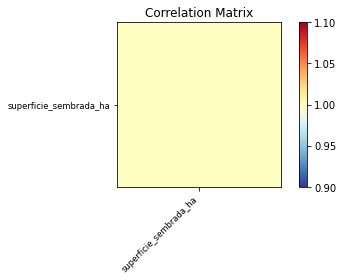

In [ ]:
import statsmodels.api as sm
corr = sup_semb.set_index('cultivo_nombre').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
cult_anio = cultivos.groupby(['cultivo_nombre'])['superficie_sembrada_ha'].apply(lambda x : x.astype('float64').sum())
cult_anio

cultivo_nombre
avena      140311954.0
centeno    118647492.0
girasol    107339916.0
maní        20299236.0
manï          441299.0
maíz       409509002.0
mijo        13722718.0
soja       440266763.0
Name: superficie_sembrada_ha, dtype: float64

In [ ]:
cult_anio = cultivos.groupby(['cultivo_nombre','anio'])['superficie_sembrada_ha'].apply(lambda x : x.astype('float64').sum())
cult_anio

cultivo_nombre  anio
avena           1923     1083760.0
                1924     1066575.0
                1925     1289990.0
                1926     1283300.0
                1927     1278900.0
                           ...    
soja            2015    20562233.0
                2016    18057162.0
                2017    17259260.0
                2018    17010277.0
                2019    16908238.0
Name: superficie_sembrada_ha, Length: 573, dtype: float64

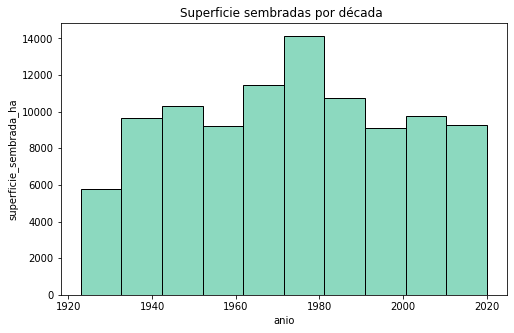

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=cultivos,x="anio",bins=10,color='mediumaquamarine').set(title="Superficie sembradas por década ",ylabel="superficie_sembrada_ha")
plt.show()

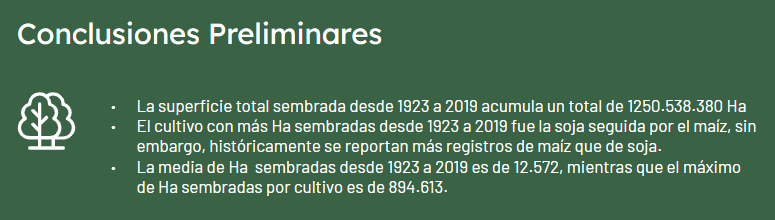

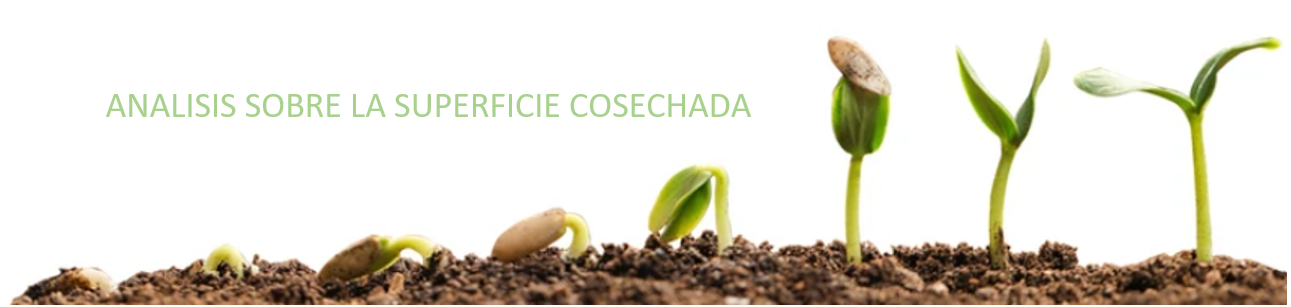

In [ ]:
Promedio= round( cultivos['superficie_cosechada_ha'].mean())
Desvio = round( cultivos['superficie_cosechada_ha'].std())
Max = round( cultivos['superficie_cosechada_ha'].max())
Min = round( cultivos['superficie_cosechada_ha'].min())
Median1 = round( cultivos['superficie_cosechada_ha'].median())


print('El promedio de superficie cosechada es ', Promedio , 'ha','Mientras que el maximo y el minimo se mueven en un rango entre',Max, 'y', Min)
print('La  mediana es de ', Median1,'.')
print('A considerar la desviación es ', Desvio)

El promedio de superficie cosechada es  10899 ha Mientras que el maximo y el minimo se mueven en un rango entre 883613 y 0
La  mediana es de  1381 .
A considerar la desviación es  34474


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

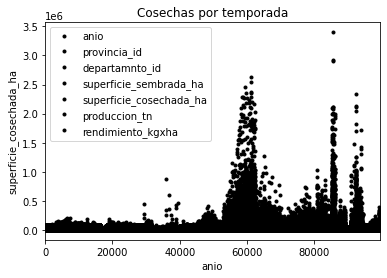

In [ ]:
plt.figure(figsize=(20,8))
cultivos.plot(style='k.')
plt.title('Cosechas por temporada')
plt.xlabel ('anio')
plt.ylabel ('superficie_cosechada_ha')
plt.xlim(cultivos.index[0],cultivos.index[-1])
plt.show
#Ver años

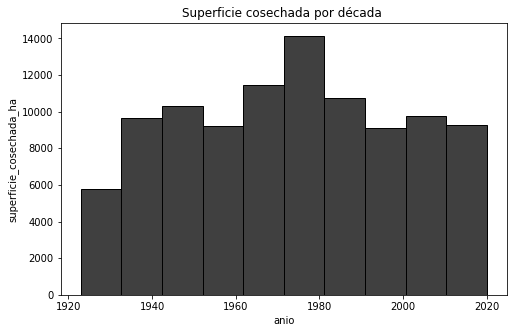

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=cultivos,x="anio",bins=10,color='black').set(title="Superficie cosechada por década ",ylabel="superficie_cosechada_ha")
plt.show()

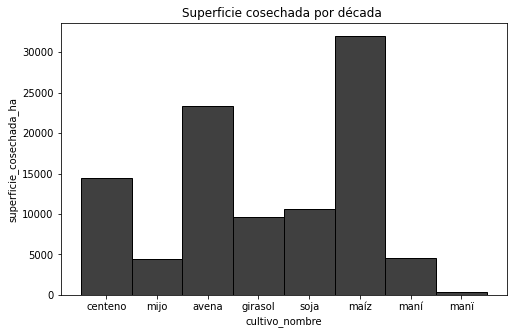

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=cultivos,x="cultivo_nombre",bins=10,color='black').set(title="Superficie cosechada por década ",ylabel="superficie_cosechada_ha")
plt.show()

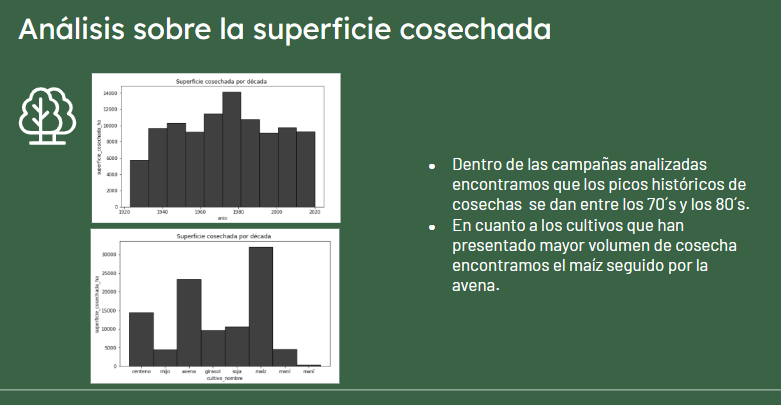

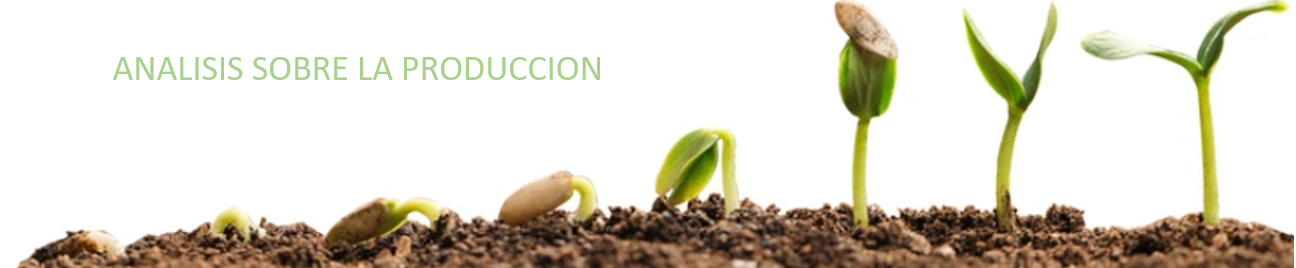

In [ ]:
Promedio= round( cultivos['produccion_tn'].mean())
Desvio = round( cultivos['produccion_tn'].std())
Max = round( cultivos['produccion_tn'].max())
Min = round( cultivos['produccion_tn'].min())
Median1 = round( cultivos['produccion_tn'].median())


print('El promedio de produccion es ', Promedio , 'Tn','Mientras que el maximo y el minimo se mueven en un rango entre',Max, 'y', Min)
print('La  mediana es de ', Median1,'.')
print('A considerar la desviación es ', Desvio)

El promedio de produccion es  29051 Tn Mientras que el maximo y el minimo se mueven en un rango entre 3399048 y 0
La  mediana es de  1710 .
A considerar la desviación es  112978


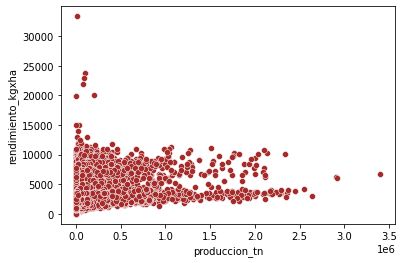

In [ ]:
sns.scatterplot(x = "produccion_tn", y = "rendimiento_kgxha", data = cultivos,color= 'brown');

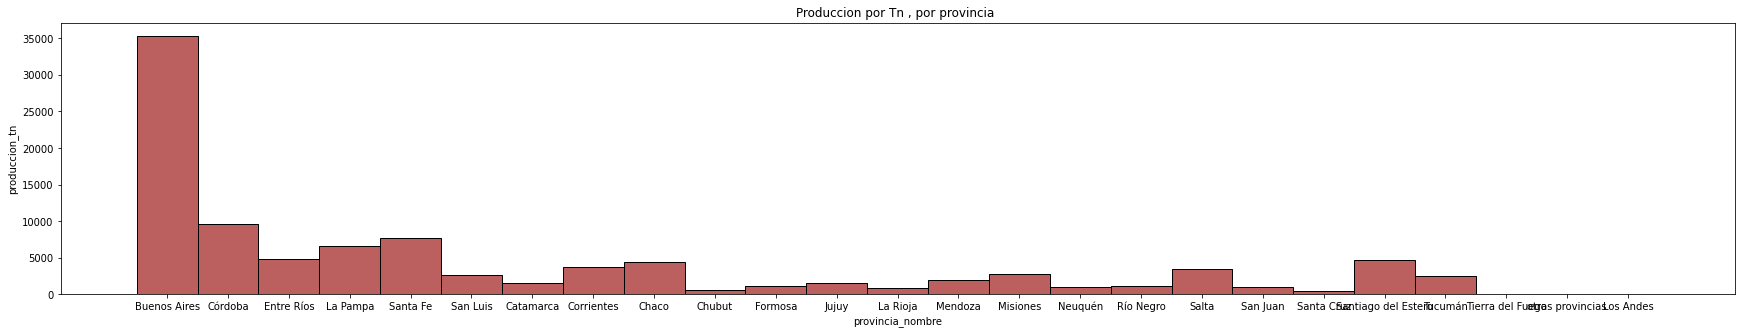

In [ ]:
plt.figure(figsize=[30,5])
sns.histplot(data=cultivos,x="provincia_nombre",bins=10,color='brown').set(title="Produccion por Tn , por provincia ",ylabel="produccion_tn")
plt.show()

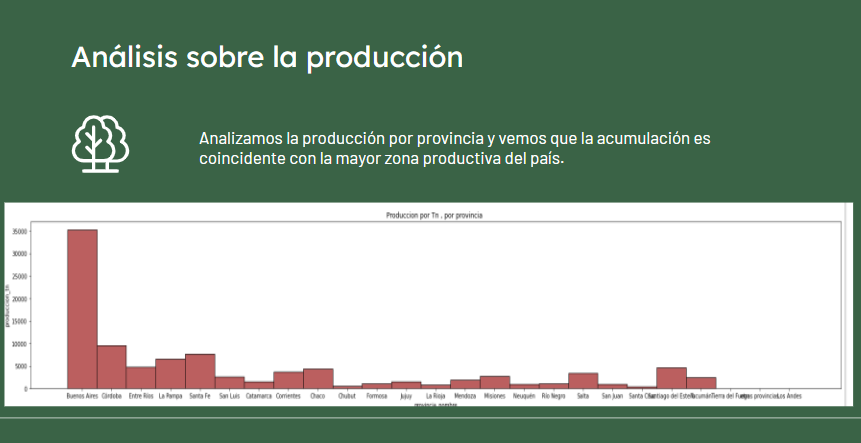

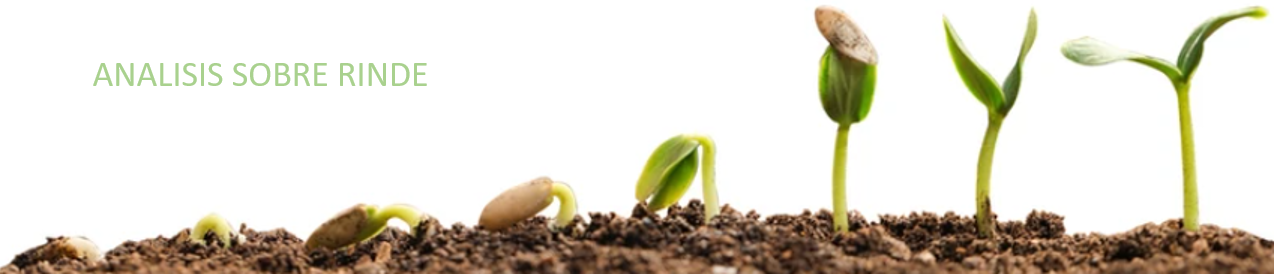


In [ ]:
Promedio= round( cultivos['rendimiento_kgxha'].mean())
Desvio = round( cultivos['rendimiento_kgxha'].std())
Max = round( cultivos['rendimiento_kgxha'].max())
Min = round( cultivos['rendimiento_kgxha'].min())
Median1 = round( cultivos['rendimiento_kgxha'].median())


print('El rinde promedio es ', Promedio , 'Kg/Ha','Mientras que el maximo y el minimo se mueven en un rango entre',Max, 'y', Min)
print('La  mediana es de ', Median1,'.')
print('A considerar la desviación es ', Desvio)

El rinde promedio es  1702 Kg/Ha Mientras que el maximo y el minimo se mueven en un rango entre 33333 y 0
La  mediana es de  1200 .
A considerar la desviación es  1499


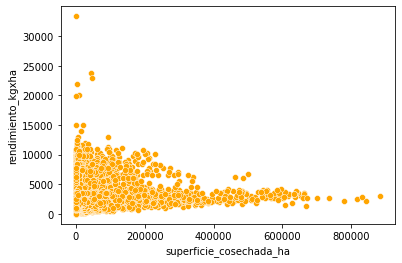

In [ ]:
sns.scatterplot(x = "superficie_cosechada_ha", y = "rendimiento_kgxha", data = cultivos,color= 'orange');

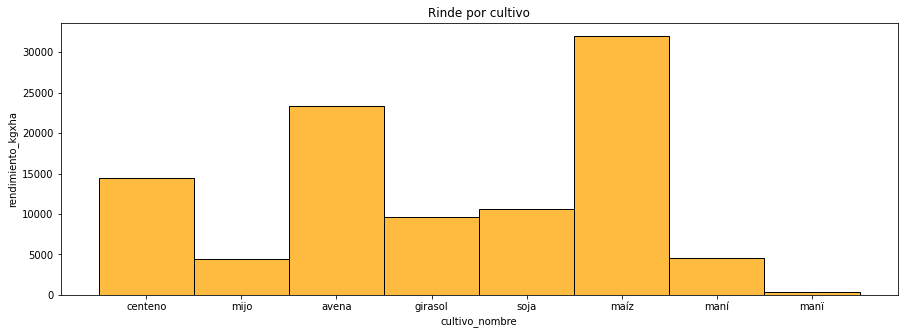

In [ ]:
plt.figure(figsize=[15,5])
sns.histplot(data=cultivos,x="cultivo_nombre",bins=10,color='orange').set(title="Rinde por cultivo",ylabel='rendimiento_kgxha')
plt.show()

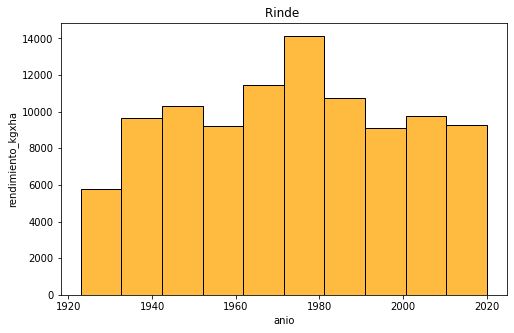

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=cultivos,x="anio",bins=10,color='orange').set(title="Rinde ",ylabel="rendimiento_kgxha")
plt.show()

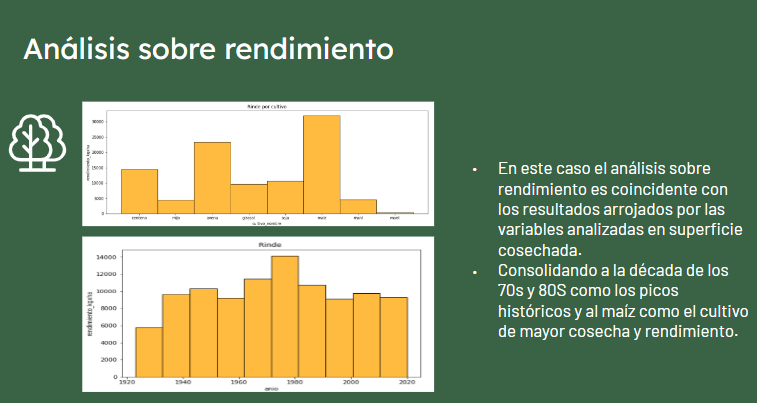

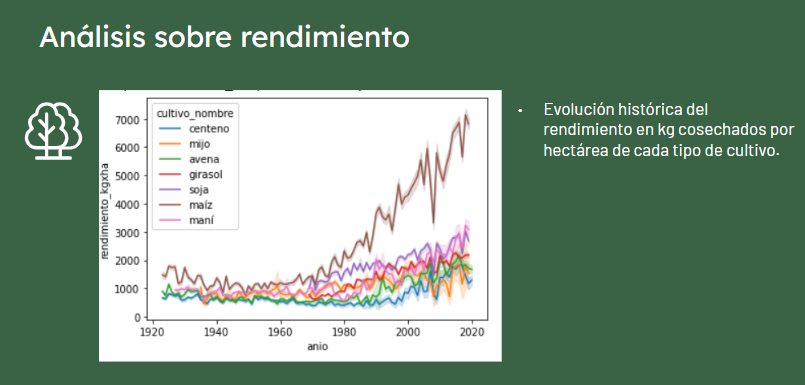

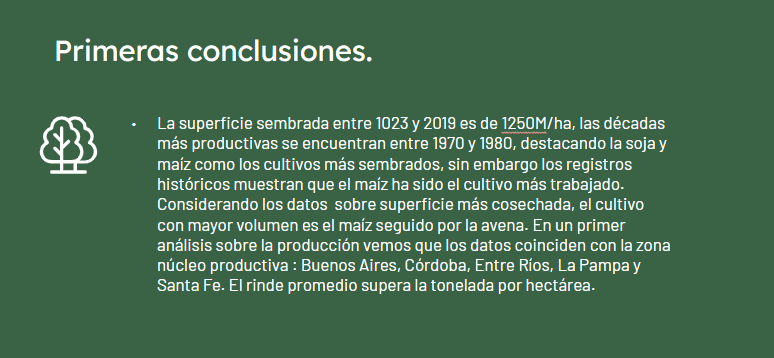

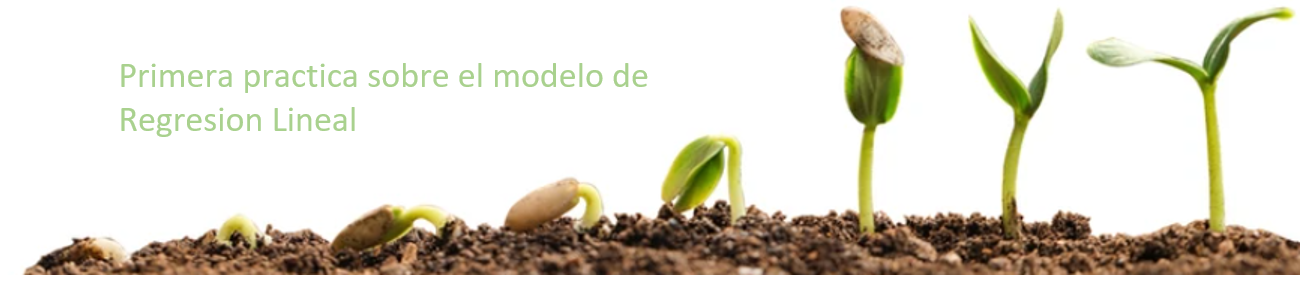

📉 ***TEST SOBRE EL RINDE PROMEDIO ENTRE 2010 Y 2020*
**

Ejemplo punto de partida -Usando excel como guia

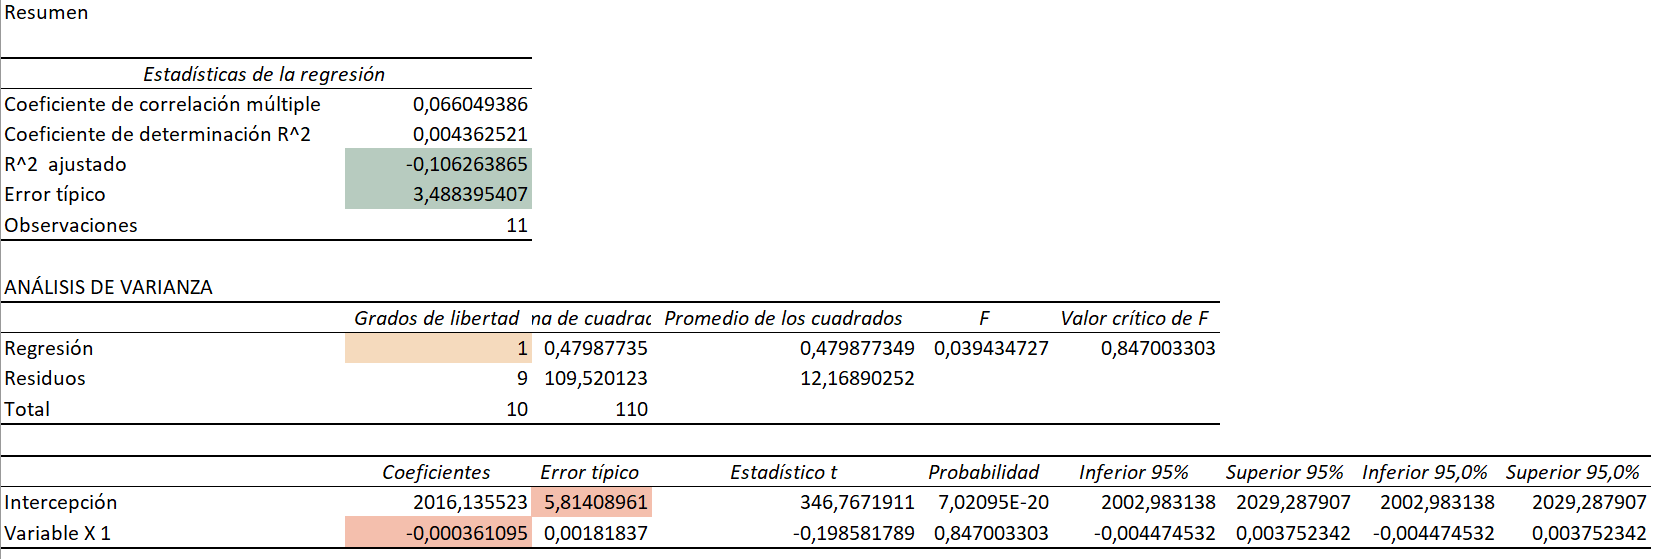

In [ ]:
#DATOS= Años desde 2010 a 2020

Seleccionamos un periodo de tiempo y sus valores promedio para probar el proceso. 

In [ ]:
anio = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
promedio= [3034,2754,2868,3159,3506,3596,3734,3051,3751,3496,1642]
rindeavg = pd.DataFrame({'Anio': anio, 'PromedioRinde': promedio})
rindeavg

,Anio,PromedioRinde
0,2010,3034
1,2011,2754
2,2012,2868
3,2013,3159
4,2014,3506
5,2015,3596
6,2016,3734
7,2017,3051
8,2018,3751
9,2019,3496


In [ ]:
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
corr_test = pearsonr(x = rindeavg['Anio'], y =  rindeavg['PromedioRinde'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.06614481748701534
P-value:  0.846784496430359


🟢 Si tomamos los valores resultantes de la correlacion de Pearson, la misma es negativa, definiendo a la correlacion como fuerte negativa, con alta variacion entre variables. Los valores p son altos con probabilidad de una hipotesis nula verdadera


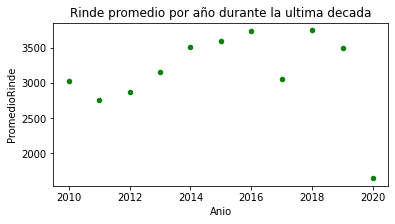

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

rindeavg.plot(
    x    = 'Anio',
    y    = 'PromedioRinde',
    kind = "scatter",
    ax   = ax,
    color = 'green'
)
ax.set_title('Rinde promedio por año durante la ultima decada');

In [ ]:
X = rindeavg[['Anio']]
y = rindeavg['PromedioRinde']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

NameError: ignored

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [158938.24324324]
Coeficiente: [('Anio', -77.37837837837837)]
Coeficiente de determinación R^2: -0.1687818926674296


🟢 R2 -> R2 negativo , corregido tiene la propiedad de ser neutral frente a la introducción de variables adicionales.Como vemos en el gráfico anterior la  variable años crece mientras que los promedios anuales presentan bajas y objetos irregulares


In [ ]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[2788.67567568]
 [3252.94594595]
 [2711.2972973 ]]

El error (rmse) de test es: 750.5575301324196


In [ ]:
X = rindeavg[['Anio']]
y = rindeavg['PromedioRinde']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.018
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.352
Time:                        13:15:26   Log-Likelihood:                -62.137
No. Observations:                   8   AIC:                             128.3
Df Residuals:                       6   BIC:                             128.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.589e+05   1.55e+05      1.029      0.3

In [ ]:
modelo.conf_int(alpha=0.05)

array([[-2.19163843e+05,  5.37040330e+05],
       [-2.65068453e+02,  1.10311696e+02]])

In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2633.918919,482.082683,1454.305091,3813.532747,634.336830,4633.501008
1,3330.324324,355.665887,2460.041250,4200.607398,1496.139935,5164.508714
2,3407.702703,416.614126,2388.284662,4427.120744,1498.238671,5317.166734
3,2866.054054,301.987406,2127.117491,3604.990617,1090.422620,4641.685488


In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

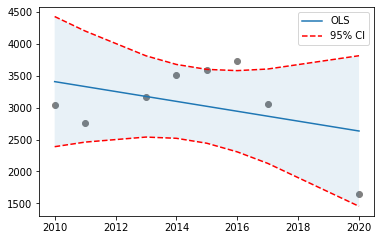

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 750.5575301324045


DATOS COMPLEMENTARIOS EN RELACION A UN PRIMER ANALISIS SOBRE EL DESARROLLO DE PRECIOS DESDE 2017 A 2022
https://colab.research.google.com/drive/1aml6vdBo6CZOgoK_-UFlFxNHK5iLbRX6?usp=sharing
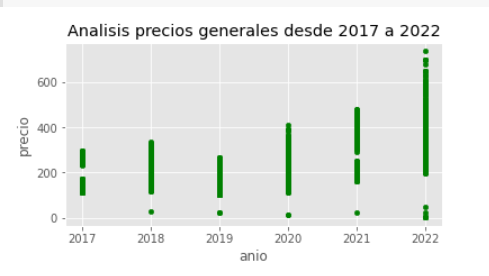

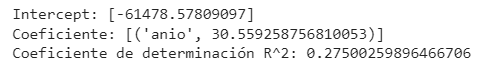

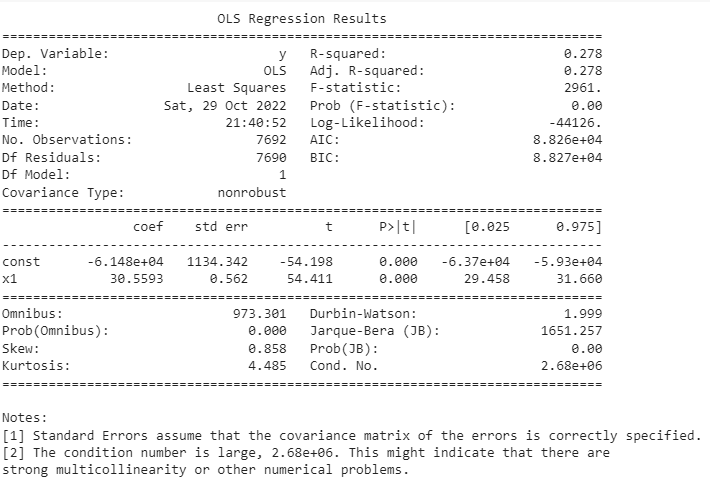

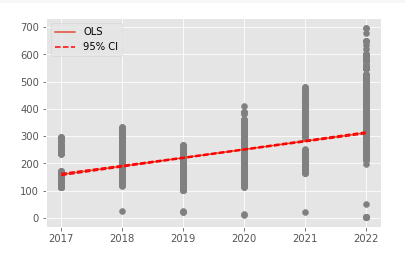